In [63]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt   #PyLab combines the numerical module numpy with the graphical plotting module pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize']=15,6

import warnings
warnings.filterwarnings('ignore')



## Problem :Prediction of Air Passengers per month

In [2]:
# Load the dataset
# def parser to specify the dateformat to read_csv(date_parser) parameter

def parser(x):
    return datetime.strptime(x,'%Y-%m')

            

air=pd.read_csv("C:\\Python\\ML\\AirPassengers.csv",index_col=0, parse_dates=[0] ,date_parser=parser)
air.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [3]:
air['#Passengers'][2]

132

In [4]:
air.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
air.shape

(144, 1)

In [6]:
# To filter all dates after March month 

print(air[datetime(1960,3,1):])


            #Passengers
Month                  
1960-03-01          419
1960-04-01          461
1960-05-01          472
1960-06-01          535
1960-07-01          622
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432


In [7]:
# To filter all dates before March month
print(air[:datetime(1960,3,1)])

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119
1949-11-01          104
1949-12-01          118
1950-01-01          115
1950-02-01          126
1950-03-01          141
1950-04-01          135
1950-05-01          125
1950-06-01          149
1950-07-01          170
1950-08-01          170
1950-09-01          158
1950-10-01          133
1950-11-01          114
1950-12-01          140
1951-01-01          145
1951-02-01          150
1951-03-01          178
1951-04-01          163
1951-05-01          172
1951-06-01          178
...                 ...
1957-10-01          347
1957-11-01          305
1957-12-01          336
1958-01-01          340
1958-02-01          318
1958-03-01          362
1958-04-01          348
1958-05-01          363
1958-06-01      

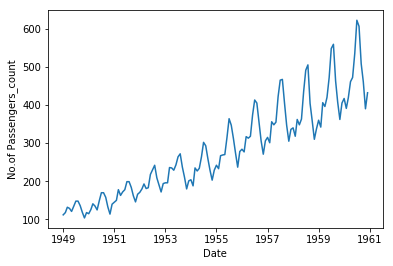

In [8]:

plt.xlabel("Date")
plt.ylabel("No.of Passengers_count")
plt.plot(air)

## From plot its observed that given time series data is varying as per time , so it not stationary.To apply TS model need to convert data into stationarity, were mean, variance , Co-variance remain constant WRT to time

#clearly evident that there is an overall increasing trend in the data along with some seasonal variations


### Stationarity check (Plotting Rolling Statistics,Dickey-Fuller Test:)

In [17]:
## Rolling statistic test : in this test we will roll datas in window =12/ 365 (month /dayswise) 
#then take mean or sum value


# for every 12 months , take mean value , 
#move that value to forthcoming month

rolmean=pd.rolling_mean(air,window=12)  

rolstd=pd.rolling_std(air,window=12)

print('rolmean:',rolmean,'rolstd:',rolstd)


rolmean:             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03

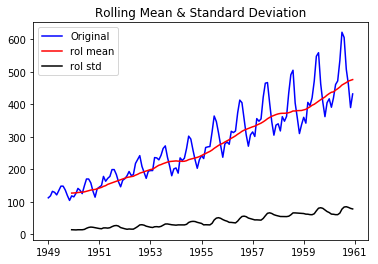

In [18]:
# Ploting rolling statistsic

org= plt.plot(air,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='rol mean')
std= plt.plot(rolstd,color='black',label='rol std')
plt.legend(loc='best')  
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


## here still rolling mean , std values are not consttant w.r.t time, it still increase as per time, so need to chk with dicky fuller test

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

In [10]:
# Perform dickyfuller test
from statsmodels.tsa.stattools import adfuller     

print('result of dickeyfuller test:')
dftest=adfuller(air['#Passengers'],autolag='AIC')  # AIC:Akaike Information Criterion 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])


for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value   # these key value is function of ADfuller(critical values)
print (dfoutput)


result of dickeyfuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## ITs oberved that  Test stat value < Critical value (0.8<3) , so non -stationarity exit based on dckyfuller test. [ note : negative sign shouldnot be considered in critcal value]
We need to reject the null hypothesis

In [35]:
# Statandard function to test timeseries data _ stationarity

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('result of dickeyfuller test:')
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])


    for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value   # these key value is function of ADfuller(critical values)
    print (dfoutput)

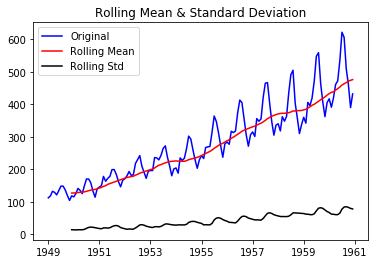

result of dickeyfuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [36]:
test_stationarity(air)

## To understand which is making timeseries non-stationarity
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. 

Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

## TO make time series statonarity , need to elimainate trend, season factor in original data
then we can acheive the stationarity 

1.Trick to reduce trend in timeseries need to do transformation in data
So we can apply transformation which penalize higher values more than smaller values. These can be taking a 
#log, square root, cube root, etc. 

Lets take a log transform here for simplicity:

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


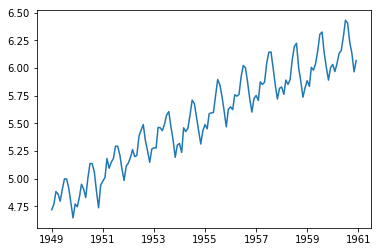

In [38]:
air_log=np.log(air)
plt.plot(air_log)
air_log

## Observation : After Log transformation applied for series, still trend raise w.r.t Time

Now we will apply following technique to reduce trend
1. Aggregation – taking average for a time period like monthly/weekly averages
2. Smoothing – taking rolling averages
3. Polynomial Fitting – fit a regression model

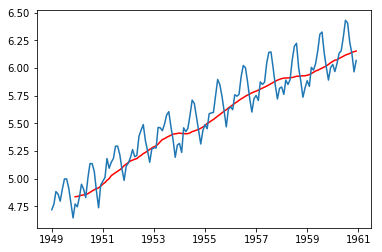

In [15]:
# Moving Avg

mov_avg=pd.rolling_mean(air_log,12)
plt.plot(mov_avg,'red')
plt.plot(air_log)

## The red line shows the rolling mean for log values(data). Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:



In [20]:
air_log_mov_avg_diff= air_log - mov_avg
air_log_mov_avg_diff.head(25)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


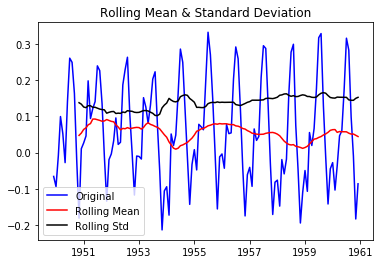

result of dickeyfuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [37]:
air_log_mov_avg_diff.dropna(inplace=True)
test_stationarity(air_log_mov_avg_diff)

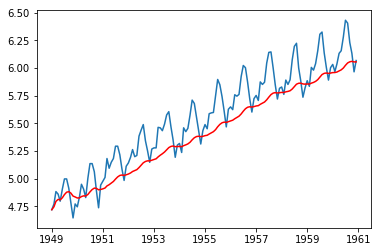

In [40]:
#exponentially weighted moving average

expwighted_avg = pd.ewma(air_log, halflife=12)
plt.plot(air_log)
plt.plot(expwighted_avg, color='red')

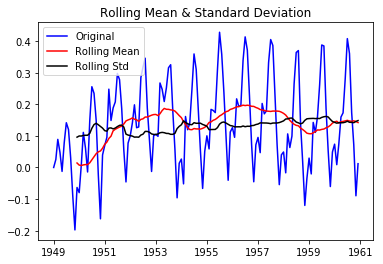

result of dickeyfuller test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415
1949-06-01,0.078468
1949-07-01,0.141648
1949-08-01,0.120164
1949-09-01,0.030677


In [42]:
air_log_expwighted_avg_diff=air_log - expwighted_avg
test_stationarity(air_log_expwighted_avg_diff)
air_log_expwighted_avg_diff.head(10)

In [53]:
# shft by 1 index no.
a1=air_log.shift()
a1

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,4.718499
1949-03-01,4.770685
1949-04-01,4.882802
1949-05-01,4.859812
1949-06-01,4.795791
1949-07-01,4.905275
1949-08-01,4.997212
1949-09-01,4.997212


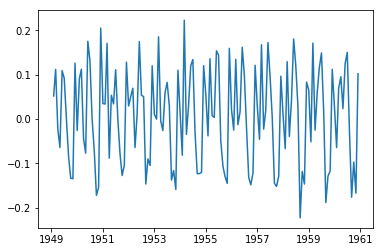

In [55]:
# this will help to reduce increasing trend 

air_log_diff=air_log - air_log.shift()
plt.plot(air_log_diff)

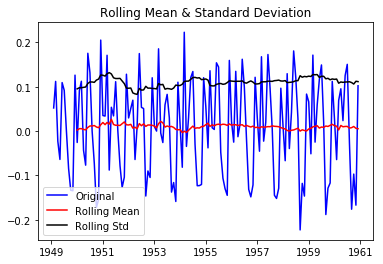

result of dickeyfuller test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [58]:
air_log_diff.dropna(inplace=True)
test_stationarity(air_log_diff)

## Decomposing

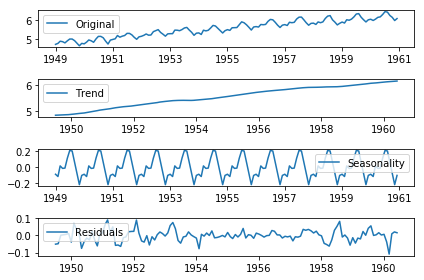

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(air_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(air_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

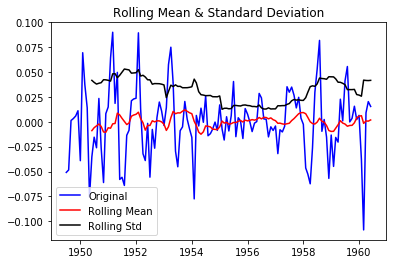

result of dickeyfuller test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [61]:
air_log_decompose = residual
air_log_decompose.dropna(inplace=True)
test_stationarity(air_log_decompose)

In [62]:
air_log_decompose.shape

(132, 1)

In [64]:
#ACF and PACF plots: to finf p, d, Q value
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(air_log_diff, nlags=20)
lag_pacf = pacf(air_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

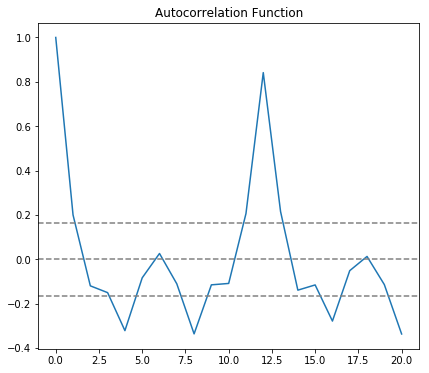

In [66]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(air_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(air_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

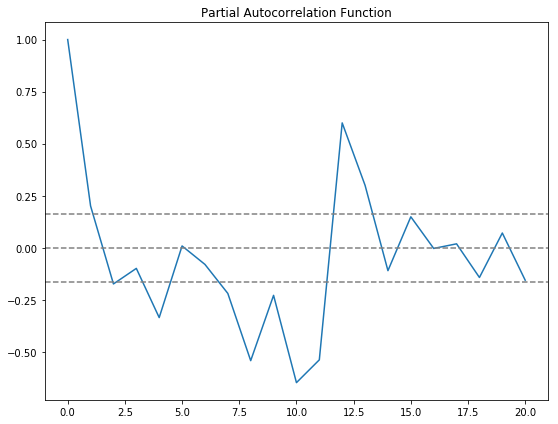

In [67]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(air_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(air_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

   ## p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Text(0.5,1,'RSS: 1.5023')

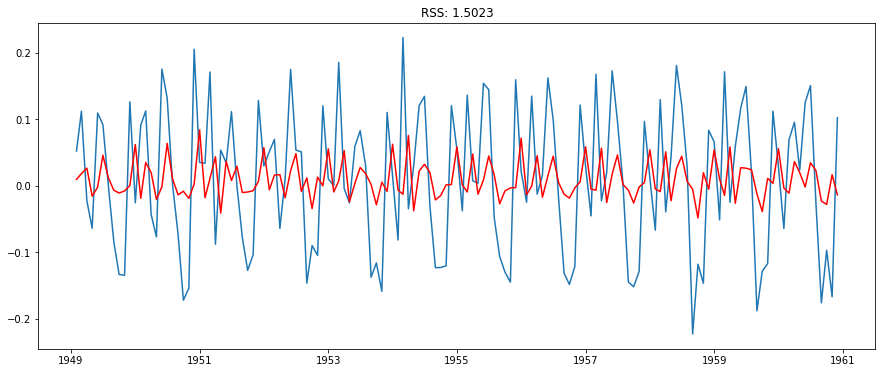

In [78]:
##  ARIMA model 
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(air_log, order=(2,1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(air_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - air_log_diff['#Passengers'])**2))

Text(0.5,1,'RSS: 1.4721')

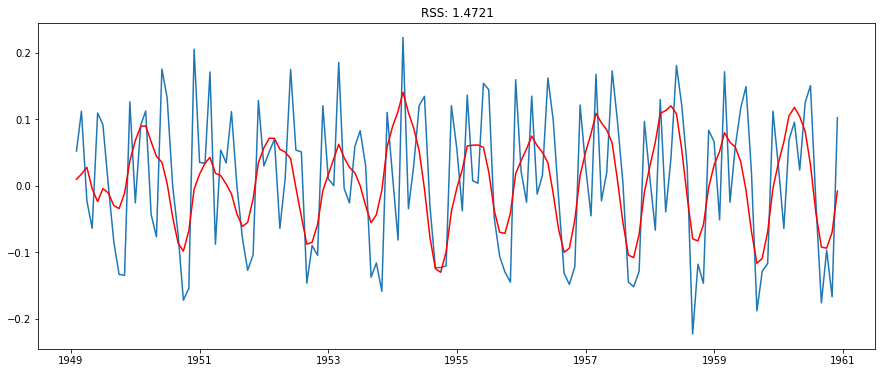

In [111]:
# MA model (p, D,  Q) 


model = ARIMA(air_log, order=(0,1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(air_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - air_log_diff['#Passengers'])**2))

Text(0.5,1,'RSS: 1.0292')

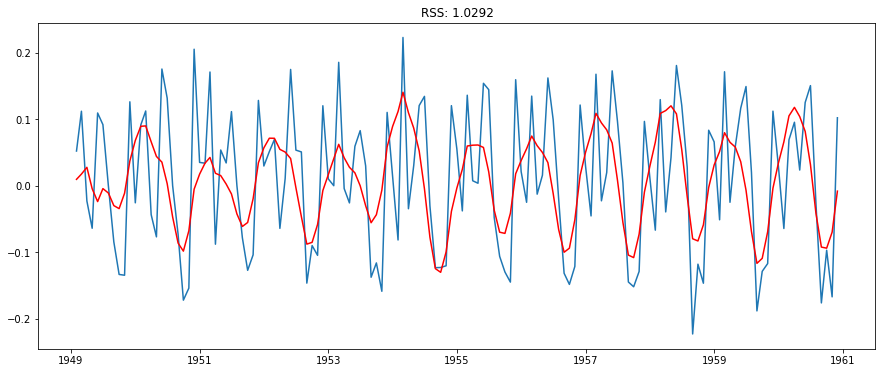

In [112]:
#ARIMA Model
model = ARIMA(air_log, order=(2,1, 2))  
results_ARMA = model.fit(disp=-1)  
plt.plot(air_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARMA.fittedvalues - air_log_diff['#Passengers'])**2))

##  It is observed that AR (Rss: 1.5), MA model (RSS: 1.5) , in ARIMA model (RSS : 1.0)
Need to take least RSS, to get  model good Acuuracy.. SO we r going for ARIMA model

In [84]:
Predict_ARIMA_diff=pd.Series(results_AR.fittedvalues, copy= True)
print(results_AR.fittedvalues.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


## These predicted value are in logscale
otice that these start from ‘1949-02-01’ and not the first month. 
Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. 
The way to convert the differencing to log scale is to add these differences consecutively to the base number.
An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. 
The cumulative sum can be found as:

In [88]:
Predict_ARIMA_diff_cumsum = Predict_ARIMA_diff.cumsum()
print (Predict_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


## You can quickly do some back of mind calculations using previous output to check if these are correct. Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [93]:
predictions_ARIMA_log = pd.Series(air_log['#Passengers'].ix[0], index=air_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(Predict_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

## Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

113.07812179081075


Text(0.5,1,'RMSE: 90.1047')

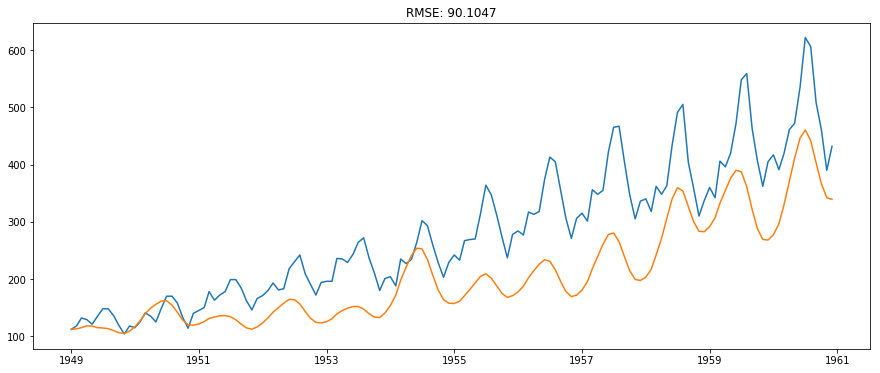

In [130]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
s2=predictions_ARIMA
print(s2[1])
plt.plot(air)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-air['#Passengers'])**2)/len(air)))

In [99]:
air_log.shape

(144, 1)

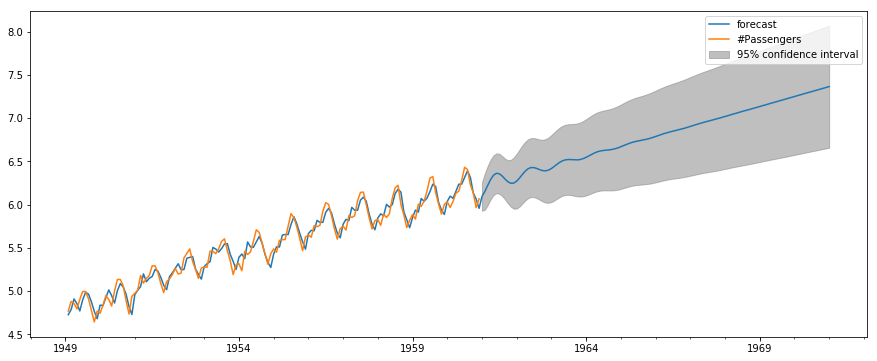

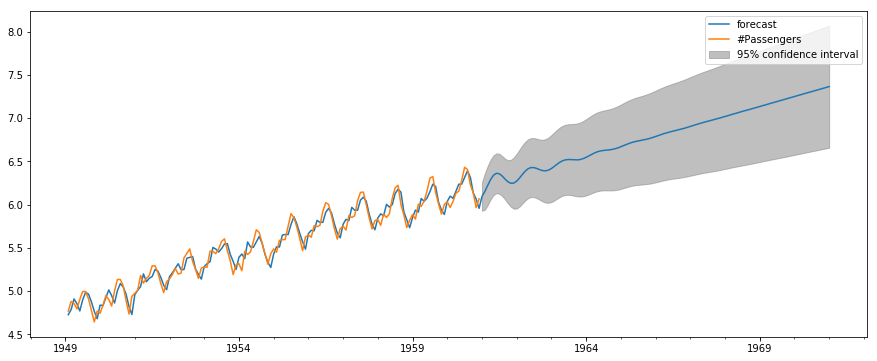

In [169]:
from statsmodels.tsa.arima_model import ARIMAResults 

results_ARMA.plot_predict(1,264) #here to find next 10 year forecast ( current 144+120=264)


In [167]:
x=results_ARMA.forecast(steps=120)[0]  # here 120 refers to next 10 years forecast
x

array([6.09553391, 6.15281399, 6.2244296 , 6.29241094, 6.34164708,
       6.36359354, 6.35784679, 6.33139299, 6.29597536, 6.2644771 ,
       6.24738322, 6.25025166, 6.27275828, 6.30940302, 6.35151482,
       6.38988643, 6.41727369, 6.43011042, 6.42906678, 6.41842479,
       6.40456145, 6.39403605, 6.39183072, 6.40019491, 6.41833679,
       6.44295393, 6.4693742 , 6.4929397 , 6.51024103, 6.51989018,
       6.52267563, 6.52112372, 6.51864511, 6.51853673, 6.52311906,
       6.53322343, 6.54812852, 6.56591539, 6.5841029 , 6.6003652 ,
       6.61313247, 6.62192761, 6.62737768, 6.63093108, 6.63438668,
       6.63937964, 6.64696483, 6.65739819, 6.67015302, 6.68414228,
       6.69806603, 6.71077877, 6.72157708, 6.73033959, 6.73749786,
       6.74386353, 6.75037297, 6.75782567, 6.76668656, 6.77699797,
       6.78841292, 6.80032826, 6.81207167, 6.82308732, 6.83307107,
       6.84202463, 6.85022283, 6.85811191, 6.8661731 , 6.8747912 ,
       6.88416272, 6.89426353, 6.90487858, 6.91567906, 6.92632